In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #sits on top of matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
churn=pd.read_csv('Data/churn.csv')

In [3]:
churn.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
churn.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [6]:
churn.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [7]:
label_plan=LabelEncoder()
churn["Int'l Plan"]=label_plan.fit_transform(churn["Int'l Plan"])

In [8]:
churn.head(2)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,OH,107,415,371-7191,0,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


In [9]:
label_mail_plan=LabelEncoder()
churn["VMail Plan"]=label_mail_plan.fit_transform(churn["VMail Plan"])

In [10]:
label_churn=LabelEncoder()
churn["Churn?"]=label_churn.fit_transform(churn["Churn?"])

In [11]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [12]:
#some plots and visualisation

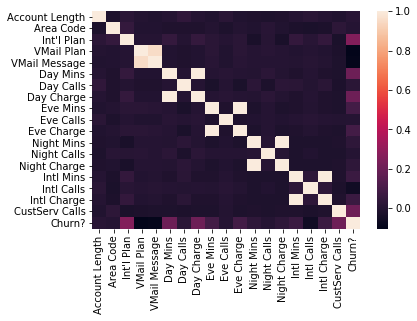

In [13]:
sns.heatmap(churn.corr())

In [14]:
#churn is connected to plan,day mins,day charge,eve mins, eve charge, intl mins, intl charge

In [15]:
#let's see if we can get weight of information?

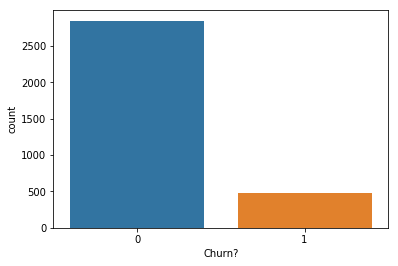

In [17]:
sns.countplot(churn['Churn?'])

In [20]:
skew=churn.skew()

In [21]:
skew

Account Length    0.096606
Area Code         1.126823
Int'l Plan        2.726332
VMail Plan        0.999140
VMail Message     1.264824
Day Mins         -0.029077
Day Calls        -0.111787
Day Charge       -0.029083
Eve Mins         -0.023877
Eve Calls        -0.055563
Eve Charge       -0.023858
Night Mins        0.008921
Night Calls       0.032500
Night Charge      0.008886
Intl Mins        -0.245136
Intl Calls        1.321478
Intl Charge      -0.245287
CustServ Calls    1.091359
Churn?            2.018356
dtype: float64

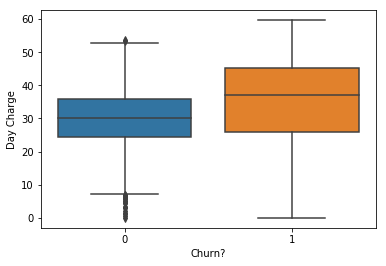

In [22]:
sns.boxplot(x="Churn?", y="Day Charge", data=churn)

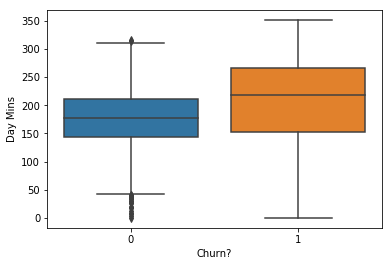

In [25]:
sns.boxplot(x="Churn?", y="Day Mins", data=churn)

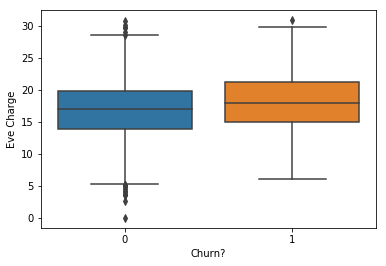

In [27]:
sns.boxplot(x="Churn?", y="Eve Charge", data=churn)

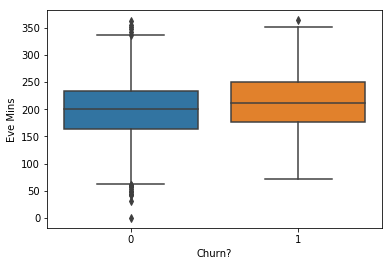

In [28]:
sns.boxplot(x="Churn?", y="Eve Mins", data=churn)

Churn by state

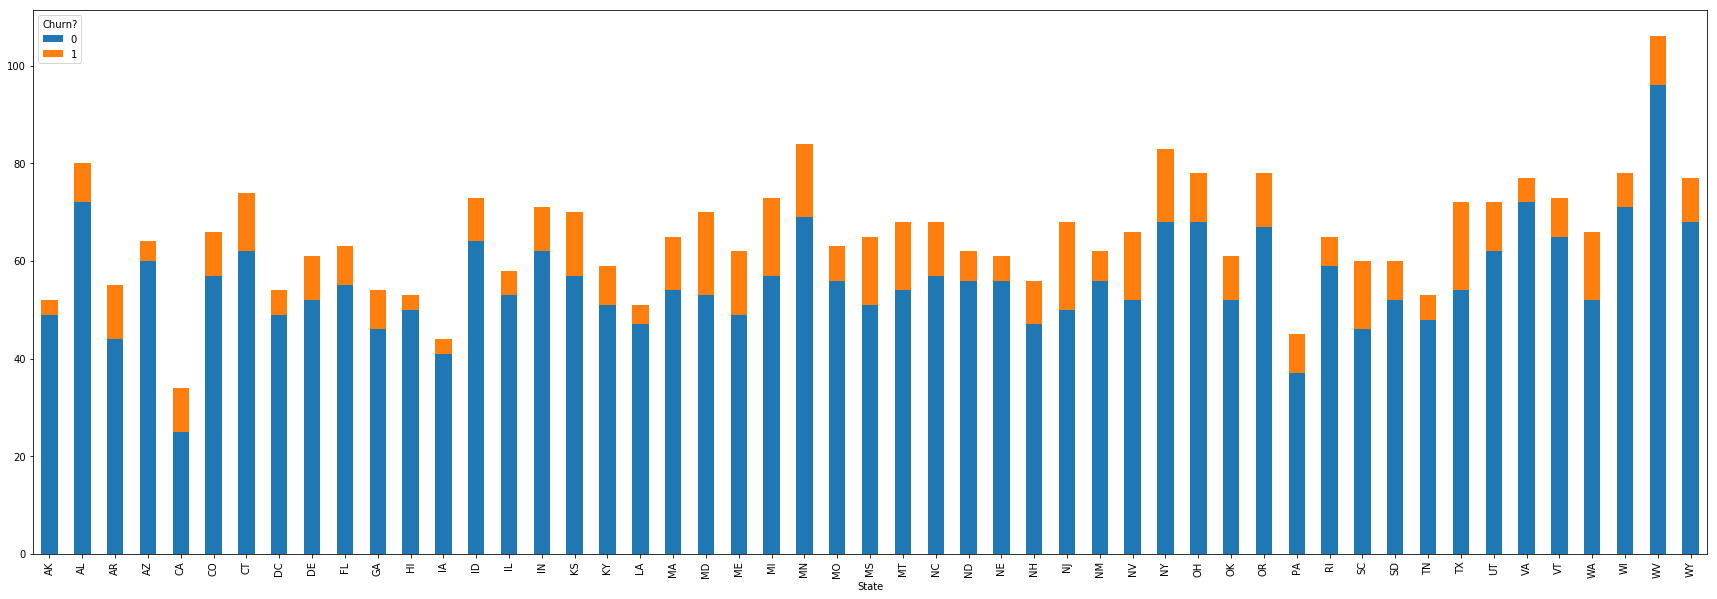

In [31]:
churn.groupby(['State','Churn?']).size().unstack().plot(kind='bar',stacked=True, figsize=(30,10))

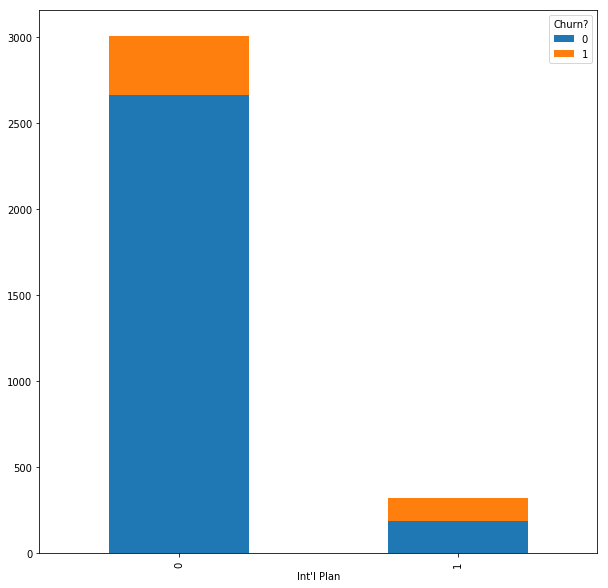

In [34]:
churn.groupby(["Int'l Plan",'Churn?']).size().unstack().plot(kind='bar',stacked=True, figsize=(10,10))

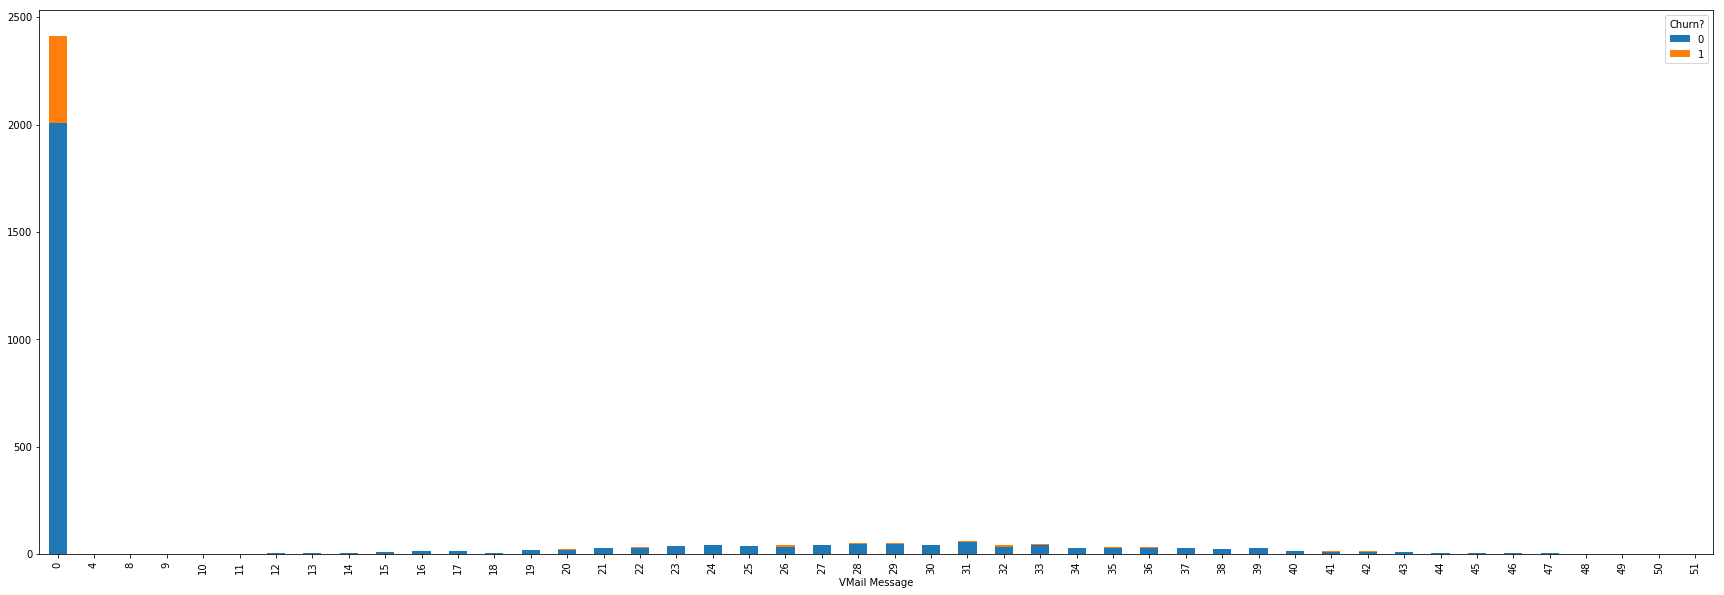

In [36]:
churn.groupby(["VMail Message",'Churn?']).size().unstack().plot(kind='bar',stacked=True, figsize=(30,10))

In [37]:
# also we need to encode state

In [40]:
label_state=LabelEncoder()
churn["State"]=label_state.fit_transform(churn["State"])
churn.head(2)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [41]:
# now wee need to drop some columns that we don't need

In [45]:
churn.drop(['Phone'],axis=1, inplace=True)

In [46]:
churn.head(2)

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [49]:
# first let's rename columns
churn.columns = ['state', 'account length','area code', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes',
'total day calls','total day charge', 'total eve minutes',  'total eve calls','total eve charge','total night minutes',
'total night calls','total night charge','total intl minutes', 'total intl calls', 'total intl charge','customer service calls','churn']

Splitting and Normalizing data

In [50]:
X=churn.drop('churn',axis=1)
y=churn['churn']

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

In [52]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Models of prediction!!!

Random Forest Classifier

In [53]:
rfc = RandomForestClassifier(n_estimators=200)

In [55]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
pred_rfc=rfc.predict(X_test)

In [57]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       862
          1       0.90      0.78      0.83       138

avg / total       0.96      0.96      0.96      1000

[[850  12]
 [ 31 107]]


In [58]:
acc=(850+107)/(850+107+12+31)

In [59]:
acc

0.957

In [60]:
#pretty good model

KNN - K nearest neighbors

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [63]:
clas_pred=classifier.predict(X_test)

In [64]:
print(classification_report(y_test,clas_pred))
print(confusion_matrix(y_test,clas_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95       862
          1       0.83      0.38      0.52       138

avg / total       0.90      0.90      0.89      1000

[[851  11]
 [ 86  52]]


SVM

In [66]:
clf=svm.SVC()

In [68]:
clf.fit(X_train,y_train)
clf_pred=clf.predict(X_test)

In [69]:
print(classification_report(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96       862
          1       0.91      0.51      0.65       138

avg / total       0.92      0.93      0.92      1000

[[855   7]
 [ 68  70]]


Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
reg= LogisticRegression(random_state=0)
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
reg_pred=reg.predict(X_test)

In [73]:
print(classification_report(y_test,reg_pred))
print(confusion_matrix(y_test,reg_pred))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       862
          1       0.55      0.19      0.28       138

avg / total       0.84      0.87      0.84      1000

[[841  21]
 [112  26]]


Neural Network

In [74]:
nlpc=MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
nlpc.fit(X_train,y_train)
nlpc_pred=nlpc.predict(X_test)

In [75]:
print(classification_report(y_test,nlpc_pred))
print(confusion_matrix(y_test,nlpc_pred))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       862
          1       0.79      0.70      0.74       138

avg / total       0.93      0.93      0.93      1000

[[836  26]
 [ 42  96]]


Best model for this prediction is Random Forest Classifier